In [22]:
%matplotlib inline

[[1.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [8.12006800e-001 5.83647973e-001 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [4.34749074e-001 7.86411702e-001 4.38805056e-001 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 ...
 [1.64931306e-200 7.27952663e-192 1.64457185e-183 ... 2.75925105e-001
  0.00000000e+000 0.00000000e+000]
 [4.22154484e-209 2.82586959e-200 9.68238833e-192 ... 6.57731921e-001
  2.75925105e-001 0.00000000e+000]
 [7.12457641e-218 7.23303264e-209 3.75864643e-200 ... 6.22997976e-001
  6.57731921e-001 2.75925105e-001]]


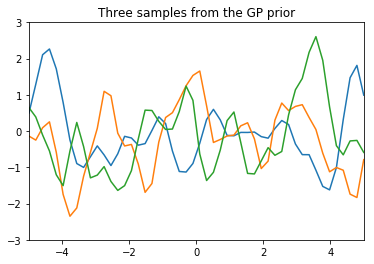

0.4967141530112327
-0.13826430117118466
0.6476885381006925


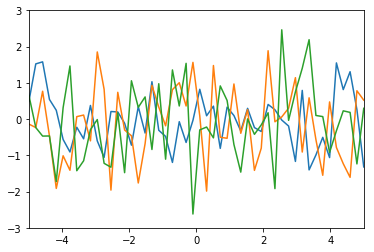

In [26]:
import numpy as np
import matplotlib.pyplot as pl

# Test data
n = 50
Xtest = np.linspace(-5, 5, n).reshape(-1,1)

# Define the kernel function
def kernel(a, b, param):
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/param) * sqdist)

param = 0.1
K_ss = kernel(Xtest, Xtest, param)

np.random.seed(42)
# Get cholesky decomposition (square root) of the
# covariance matrix
L = np.linalg.cholesky(K_ss)# + 1e-15*np.eye(n))
print(L)
# Sample 3 sets of standard normals for our test points,
# multiply them by the square root of the covariance matrix
normal_distributed_samples=np.random.normal(size=(n,3))
f_prior = np.dot(L, normal_distributed_samples)

# Now let's plot the 3 sampled functions.

pl.plot(Xtest, f_prior)
pl.axis([-5, 5, -3, 3])
pl.title('Three samples from the GP prior')
pl.show()

np.random.seed(42)

for x in range(3):
    print(normal_distributed_samples[0][x])

np.random.seed(42)
pl.plot(Xtest, np.random.normal(size=(n,3)))
pl.axis([-5, 5, -3, 3])
pl.show()

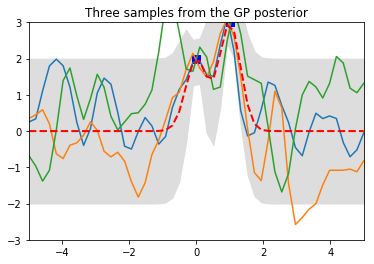

In [27]:
# Noiseless training data
Xtrain = np.array([0, 1]).reshape(2,1)
ytrain = np.array([2, 3]).reshape(2,1)

# Apply the kernel function to our training points
K = kernel(Xtrain, Xtrain, param)
L = np.linalg.cholesky(K) #+ 0.00005*np.eye(len(Xtrain)))

# Compute the mean at our test points.
K_s = kernel(Xtrain, Xtest, param)
Lk = np.linalg.solve(L, K_s)
mu = np.dot(Lk.T, np.linalg.solve(L, ytrain)).reshape((n,))

# Compute the standard deviation so we can plot it
s2 = np.diag(K_ss) - np.sum(Lk**2, axis=0)
stdv = np.sqrt(s2)
# Draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ss - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,3)))

pl.plot(Xtrain, ytrain, 'bs', ms=8)
pl.plot(Xtest, f_post)
pl.gca().fill_between(Xtest.flat, mu-2*stdv, mu+2*stdv, color="#dddddd")
pl.plot(Xtest, mu, 'r--', lw=2)
pl.axis([-5, 5, -3, 3])
pl.title('Three samples from the GP posterior')
pl.show()